In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import classification_report, plot_precision_recall_curve
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
import graphviz
from graphviz import Source
import seaborn as sns
import os
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
root_path = "drive/MyDrive/ML_project"
orig = root_path + "/bases_originales"
clean = root_path + "/bases limpias"
plots = root_path + "/plots"
GIS = orig + "/GIS"

In [8]:
data_base = pd.read_pickle(clean + "/MASTER_ENDIREH2016_coded_HSR.pkl")

In [7]:
data_base['suffers_violence'] = (data_base['tot_violent'] > 0)

In [ ]:
db = data_base[['ESTRATO', 'PAREN', 'EDAD', 'P2_5', 'P2_6', 'leer_escribir', 'P2_9', 'P2_10', 
            'P2_11', 'ocup_simple_m', 'P2_16', 'num_per_hog', 'num_mujeres_hog', 'mujeres_adultas', 'mujeres_no_adultas', 'secundaria_terminada', 
            'prepa_terminada', 'licenciatura_terminada', 'leer', 'num_indigenas', 'num_trabajadoras', 'max_educativo', 'num_hombres_hog', 'hombres_adultos', 
            'hombres_no_adultos', 'h_secundaria_terminada', 'h_prepa_terminada', 'h_licenciatura_terminada', 'h_leer', 'h_num_indigenas', 'num_trabajadores', 
            'h_max_educativo', 'p_sec_terminada', 'p_prepa_terminada', 'p_licenciatura_terminada', 'p_indigena', 'p_trabaja', 'ocup_simple_h', 
            'dif_edad', 'P4AB_1', 'P4_1', 'ing_mens_m', 'P4_3', 'ing_mens_h', 'P4_8_1', 'P4_8_2', 'P4_8_3', 'P4_8_4', 
            'P4_8_5', 'P4_8_6', 'P4_8_7', 'P4_8_8', 'P4_11', 'P1_2', 'P1_2_A', 'P1_3', 'P1_4_1', 'P1_4_2', 'P1_4_3', 'P1_4_4', 'P1_4_5', 
            'P1_4_6', 'P1_4_7', 'P1_4_8', 'P1_4_9', 'num_per_viv', 'P1_8', 'P15_1_1', 'P15_1_2', 'P15_1_3', 'P15_1_4', 'P15_1_5', 'P15_1_6', 
            'P15_1_7', 'P15_1_8', 'P15_1_9', 'P16_1_1', 'P16_1_2', 'P16_1_3', 'P16_1_4', 'P16_1_5', 'P16_1_6', 'P16_2_1', 'P16_2_2', 'P16_2_3', 
            'P16_2_4', 'P16_2_5', 'P16_2_6', 'asset_1_0.0', 'asset_1_1.0', 'asset_1_2.0', 'asset_1_3.0', 'asset_2_0.0', 'asset_2_1.0', 'asset_2_2.0',
            'asset_2_3.0', 'asset_3_0.0', 'asset_3_1.0', 'asset_3_2.0', 'asset_3_3.0', 'asset_4_0.0', 'asset_4_1.0', 'asset_4_2.0', 'asset_4_3.0',
            'asset_5_0.0', 'asset_5_1.0', 'asset_5_2.0', 'asset_5_3.0', 'asset_6_0.0', 'asset_6_1.0', 'asset_6_2.0', 'asset_6_3.0', 'asset_7_0.0', 'asset_7_1.0',
            'asset_7_2.0', 'asset_7_3.0', 'P1_1_1', 'P1_1_2', 'P1_1_3', 'P1_5_1', 'P1_5_2', 'P1_5_3', 'P1_5_4', 'P1_5_5', 'P1_5_6', 'P1_6_1', 'P1_6_2', 'P1_6_3',
            'P1_6_4', 'P1_6_5', 'P17_1_1_1_1', 'P17_1_1_1_10', 'P17_1_1_1_11', 'P17_1_1_1_12', 'P17_1_1_1_13', 'P17_1_1_1_14', 'P17_1_1_1_15', 'P17_1_1_1_2',
            'P17_1_1_1_3', 'P17_1_1_1_4', 'P17_1_1_1_5', 'P17_1_1_1_6', 'P17_1_1_1_7', 'P17_1_1_1_8', 'P17_1_1_1_9', 'P17_1_2_1_1', 'P17_1_2_1_10', 'P17_1_2_1_11', 
            'P17_1_2_1_12', 'P17_1_2_1_13', 'P17_1_2_1_14', 'P17_1_2_1_15', 'P17_1_2_1_2', 'P17_1_2_1_3', 'P17_1_2_1_4', 'P17_1_2_1_5', 'P17_1_2_1_6', 'P17_1_2_1_7',
            'P17_1_2_1_8', 'P17_1_2_1_9', 'P17_1_3_1_1', 'P17_1_3_1_10', 'P17_1_3_1_11', 'P17_1_3_1_12', 'P17_1_3_1_13', 'P17_1_3_1_14', 'P17_1_3_1_15',
            'P17_1_3_1_2', 'P17_1_3_1_3', 'P17_1_3_1_4', 'P17_1_3_1_5', 'P17_1_3_1_6', 'P17_1_3_1_7', 'P17_1_3_1_8','P17_1_3_1_9', 'P17_1_4_1_1', 'P17_1_4_1_10', 
            'P17_1_4_1_11', 'P17_1_4_1_12', 'P17_1_4_1_13', 'P17_1_4_1_14', 'P17_1_4_1_15', 'P17_1_4_1_2', 'P17_1_4_1_3', 'P17_1_4_1_4', 'P17_1_4_1_5', 'P17_1_4_1_6',
            'P17_1_4_1_7', 'P17_1_4_1_8', 'P17_1_4_1_9', 'P17_1_5_1_1', 'P17_1_5_1_10', 'P17_1_5_1_11', 'P17_1_5_1_12', 'P17_1_5_1_13', 'P17_1_5_1_14', 'P17_1_5_1_15',
            'P17_1_5_1_2', 'P17_1_5_1_3', 'P17_1_5_1_4', 'P17_1_5_1_5', 'P17_1_5_1_6', 'P17_1_5_1_7', 'P17_1_5_1_8', 'P17_1_5_1_9', 'P17_1_6_1_1', 'P17_1_6_1_10',
            'P17_1_6_1_11', 'P17_1_6_1_12', 'P17_1_6_1_13', 'P17_1_6_1_14', 'P17_1_6_1_15', 'P17_1_6_1_2', 'P17_1_6_1_3', 'P17_1_6_1_4', 'P17_1_6_1_5','P17_1_6_1_6',
            'P17_1_6_1_7', 'P17_1_6_1_8', 'P17_1_6_1_9', 'P17_1_7_1_1', 'P17_1_7_1_10', 'P17_1_7_1_11', 'P17_1_7_1_12', 'P17_1_7_1_13', 'P17_1_7_1_14', 'P17_1_7_1_15',
            'P17_1_7_1_2','P17_1_7_1_3', 'P17_1_7_1_4', 'P17_1_7_1_5', 'P17_1_7_1_6', 'P17_1_7_1_7', 'P17_1_7_1_8', 'P17_1_7_1_9', 'P4_6_AB_0.0', 'P4_6_AB_1.0',
            'P4_6_AB_3.0', 'P16_3_1_1_1', 'P16_3_1_1_2', 'P16_3_1_1_3', 'P16_3_1_1_4', 'P16_3_1_1_5', 'P16_3_1_1_6', 'P16_3_2_1_1', 'P16_3_2_1_2', 'P16_3_2_1_3',
            'P16_3_2_1_4', 'P16_3_2_1_5', 'P16_3_2_1_6', 'P16_3_3_1_1', 'P16_3_3_1_2', 'P16_3_3_1_3', 'P16_3_3_1_4', 'P16_3_3_1_5', 'P16_3_3_1_6', 'P16_3_4_1_1',
            'P16_3_4_1_2', 'P16_3_4_1_3', 'P16_3_4_1_4', 'P16_3_4_1_5', 'P16_3_4_1_6', 'P16_3_5_1_1', 'P16_3_5_1_2', 'P16_3_5_1_3', 'P16_3_5_1_4', 'P16_3_5_1_5',
            'P16_3_5_1_6', 'P16_3_6_1_1', 'P16_3_6_1_2', 'P16_3_6_1_3', 'P16_3_6_1_4', 'P16_3_6_1_5', 'P16_3_6_1_6', 'suffers_violence']]


In [ ]:
df_train, df_test = train_test_split(db, test_size=0.2, random_state=1)
train_features = df_train.drop(columns = ['suffers_violence'])
train_target = df_train['suffers_violence']
test_target = df_test['suffers_violence']
test_features = df_test.drop(columns = ['suffers_violence'])

## 1. Tree

In [ ]:
hyperparameters =  {'criterion': ['gini', 'entropy'], 'max_depth':[10, 20, 30], 'min_samples_split':[1000, 3000]}

grid_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0, class_weight = 'balanced'),
             param_grid=hyperparameters,
             cv=10,
             return_train_score=True,
             scoring=['accuracy', 'recall', 'precision'],
             refit='recall')

#Fitting the model
grid_tree.fit(train_features, train_target)
tree_model_y_hat = grid_tree.predict(test_features)

#Results
model_results = pd.DataFrame(grid_tree.cv_results_)
ranked_model = model_results.sort_values(by=['rank_test_recall'])
ranked_model[['param_criterion', 'param_max_depth', 'param_min_samples_split',
              'mean_test_recall', 'mean_test_accuracy']]

,param_criterion,param_max_depth,param_min_samples_split,mean_test_recall,mean_test_accuracy
4,gini,30,1000,0.568185,0.576642
10,entropy,30,1000,0.566357,0.577792
2,gini,20,1000,0.565617,0.576917
8,entropy,20,1000,0.563485,0.578203
3,gini,20,3000,0.556957,0.577398
5,gini,30,3000,0.556957,0.577398
9,entropy,20,3000,0.554825,0.577792
11,entropy,30,3000,0.554825,0.577792
1,gini,10,3000,0.544556,0.580332
7,entropy,10,3000,0.543512,0.581104


In [ ]:
ranked_model

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,split5_test_accuracy,split6_test_accuracy,split7_test_accuracy,split8_test_accuracy,split9_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,split5_train_accuracy,split6_train_accuracy,split7_train_accuracy,split8_train_accuracy,split9_train_accuracy,mean_train_accuracy,std_train_accuracy,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,split5_test_recall,split6_test_recall,...,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,split4_train_recall,split5_train_recall,split6_train_recall,split7_train_recall,split8_train_recall,split9_train_recall,mean_train_recall,std_train_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,split5_test_precision,split6_test_precision,split7_test_precision,split8_test_precision,split9_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,split4_train_precision,split5_train_precision,split6_train_precision,split7_train_precision,split8_train_precision,split9_train_precision,mean_train_precision,std_train_precision
4,2.118864,0.099510,0.075369,0.005368,gini,30,1000,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.564419,0.587408,0.570767,0.561674,0.581332,0.573439,0.573782,0.589911,0.586136,0.577557,0.576642,0.009118,12,0.595196,0.612201,0.596778,0.595577,0.603801,0.611941,0.606718,0.604240,0.598807,0.606966,0.603223,0.006067,0.585472,0.529361,0.600522,0.603568,0.556136,0.520017,0.556571,...,0.568185,0.033081,1,0.634627,0.558961,0.635129,0.633243,0.607426,0.563866,0.594034,0.602253,0.625653,0.566573,0.602177,0.028900,0.459072,0.479134,0.465587,0.457605,0.473684,0.463538,0.466108,0.483261,0.480795,0.468534,0.469732,0.008604,12,0.489721,0.507484,0.491268,0.490085,0.498038,0.507131,0.501101,0.498479,0.493122,0.501433,0.497786,0.006283
10,2.169235,0.082815,0.074996,0.006522,entropy,30,1000,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.576771,0.583805,0.574884,0.565106,0.574468,0.571380,0.573095,0.588023,0.585621,0.584763,0.577792,0.007038,8,0.600667,0.607683,0.600934,0.596149,0.602143,0.607385,0.605212,0.605936,0.602372,0.611751,0.604023,0.004226,0.564158,0.548499,0.577459,0.621845,0.553960,0.537424,0.556136,...,0.566357,0.029234,2,0.612725,0.580525,0.612551,0.652630,0.610085,0.578321,0.591327,0.591713,0.623187,0.555840,0.600891,0.025815,0.469587,0.476029,0.468243,0.461712,0.466642,0.462547,0.465404,0.480719,0.480163,0.476116,0.470716,0.006683,6,0.494846,0.502175,0.495135,0.490908,0.496342,0.501867,0.499490,0.500266,0.496648,0.507012,0.498469,0.004379
2,2.039866,0.056457,0.080019,0.007489,gini,20,1000,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.564419,0.587408,0.571968,0.561674,0.581160,0.573782,0.573782,0.589224,0.588195,0.577557,0.576917,0.009164,11,0.595196,0.612201,0.596988,0.595577,0.603744,0.611675,0.606718,0.604735,0.599931,0.606966,0.603373,0.005943,0.585472,0.529361,0.599217,0.603568,0.555265,0.518277,0.556571,...,0.565617,0.031654,3,0.634627,0.558961,0.632615,0.633243,0.606411,0.561013,0.594034,0.593212,0.612744,0.566573,0.599343,0.028232,0.459072,0.479134,0.466621,0.457605,0.473469,0.463785,0.466108,0.482183,0.482498,0.468534,0.469901,0.008605,11,0.489721,0.507484,0.491437,0.490085,0.497975,0.506858,0.501101,0.498983,0.494113,0.501433,0.497919,0.006165
8,2.184959,0.049464,0.074012,0.006041,entropy,20,1000,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.576771,0.585006,0.575399,0.565963,0.574468,0.571551,0.573095,0.

Graph tree

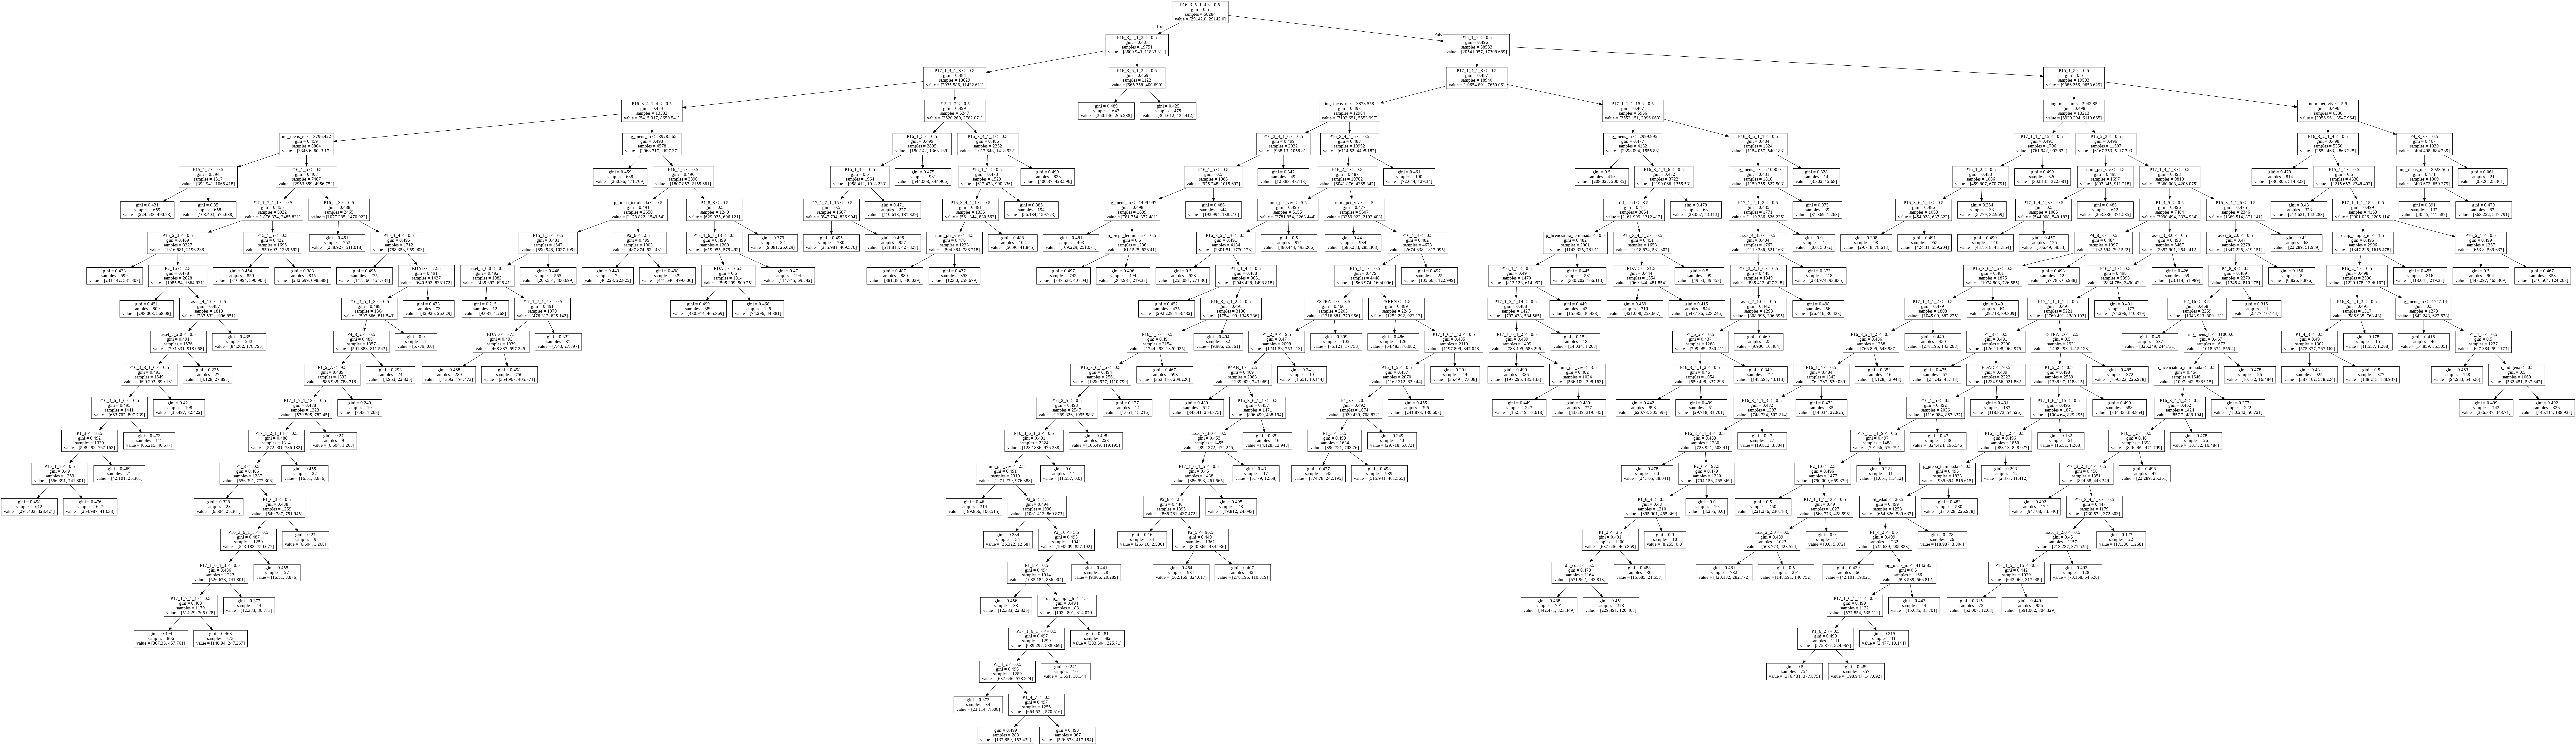

In [ ]:
from sklearn import tree
import pydotplus
from IPython.display import Image
import graphviz
from graphviz import Source
from sklearn import tree

col_names = db.drop(columns='suffers_violence').columns
graph = Source(tree.export_graphviz(grid_tree.best_estimator_, out_file=None, feature_names=col_names))
graph.format = 'png'
graph.render('dtree_render',view=True)
Image("dtree_render.png")

Best estimator scoring metrics

In [ ]:
y_predicted_tree = grid_tree.best_estimator_.predict(test_features)
print(grid_tree.best_params_)
print(classification_report(test_target, y_predicted_tree))

{'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 1000}
              precision    recall  f1-score   support

       False       0.68      0.53      0.60      8847
        True       0.46      0.62      0.53      5724

    accuracy                           0.57     14571
   macro avg       0.57      0.58      0.56     14571
weighted avg       0.60      0.57      0.57     14571



Feature importance

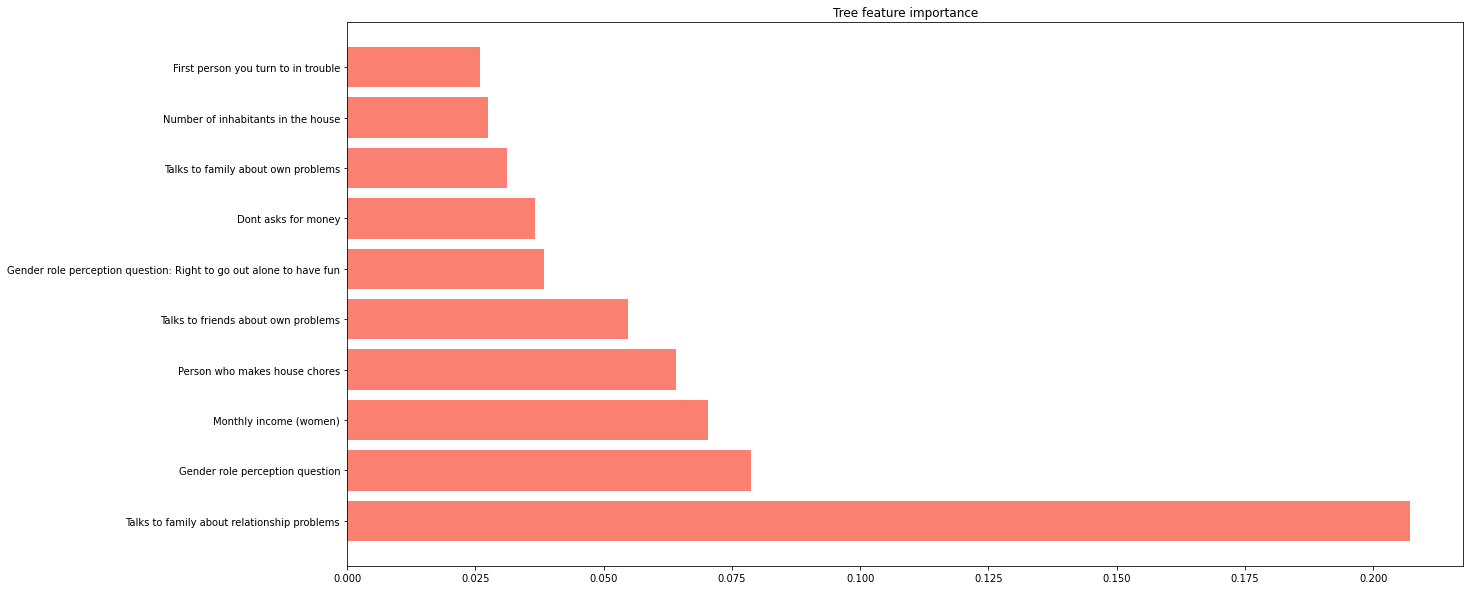

In [ ]:
col_names = db.drop(columns='suffers_violence').columns
# Get feature importances
importances = grid_tree.best_estimator_.feature_importances_

# Sort in descending order
indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
names = [col_names[i] for i in indices]

# Plot
plt.figure(figsize=(20, 10))
plt.barh(range(train_features[names[:10]].shape[1]),importances[indices[:10]], color='salmon')
#plt.xticks(range(train_features[names[:10]].shape[1]), names[:10], rotation=90)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['Talks to family about relationship problems', 'Gender role perception question', 'Monthly income (women)', 'Person who makes house chores', 
                                            'Talks to friends about own problems', 'Gender role perception question: Right to go out alone to have fun', 'Dont asks for money','Talks to family about own problems',
                                            'Number of inhabitants in the house', 'First person you turn to in trouble'])
plt.title('Tree feature importance')
plt.savefig(plots + '/tree_importance.png')
plt.show()


## 2. Random Forest

**Balanced Tree**

In [4]:
param_rf = {'n_estimators' : [100], 'criterion': ['gini', 'entropy'], 
            'max_depth' : [10, 20, 30], 'min_samples_split': [100, 500, 1000, 3000]}
est_rf = RandomForestClassifier(class_weight='balanced')
k = 10
grid_random = GridSearchCV(estimator=est_rf, 
                         param_grid=param_rf, 
                         scoring=['accuracy', 'precision', 'recall'], 
                         cv=k,
                         refit='recall',
                        return_train_score=True)
grid_random.fit(train_features, train_target)

NameError: ignored

In [ ]:
y_rf_pred = grid_random.predict(test_features)
search_rf = pd.DataFrame(grid_random.cv_results_) 
sort_search_rf = search_rf.sort_values(by=['rank_test_accuracy'])
sort_search_rf[['mean_fit_time', 'mean_score_time', 'param_criterion', 'param_max_depth', 'param_min_samples_split', 
                'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']]

,mean_fit_time,mean_score_time,param_criterion,param_max_depth,mean_test_accuracy,mean_test_precision,mean_test_recall,param_min_samples_split
16,12.598891,0.201242,entropy,20,0.616979,0.514088,0.524542,100
20,13.944851,0.219894,entropy,30,0.616087,0.513073,0.521756,100
8,13.044125,0.212549,gini,30,0.615383,0.511904,0.530285,100
4,12.051279,0.208578,gini,20,0.614851,0.511306,0.528458,100
0,7.789405,0.156855,gini,10,0.611283,0.506917,0.524455,100
12,7.710789,0.149959,entropy,10,0.610871,0.506505,0.521626,100
13,7.036980,0.142516,entropy,10,0.608452,0.503379,0.536029,500
1,7.133833,0.147271,gini,10,0.608417,0.503288,0.535594,500
21,9.751496,0.169943,entropy,30,0.608229,0.502932,0.558264,500
5,9.173499,0.165808,gini,20,0.608091,0.502790,0.556828,500


In [ ]:
best_model = grid_random.best_estimator_
print(grid_random.best_params_)
y_predicted = best_model.predict(test_features)
print(classification_report(test_target, y_predicted))

NameError: ignored

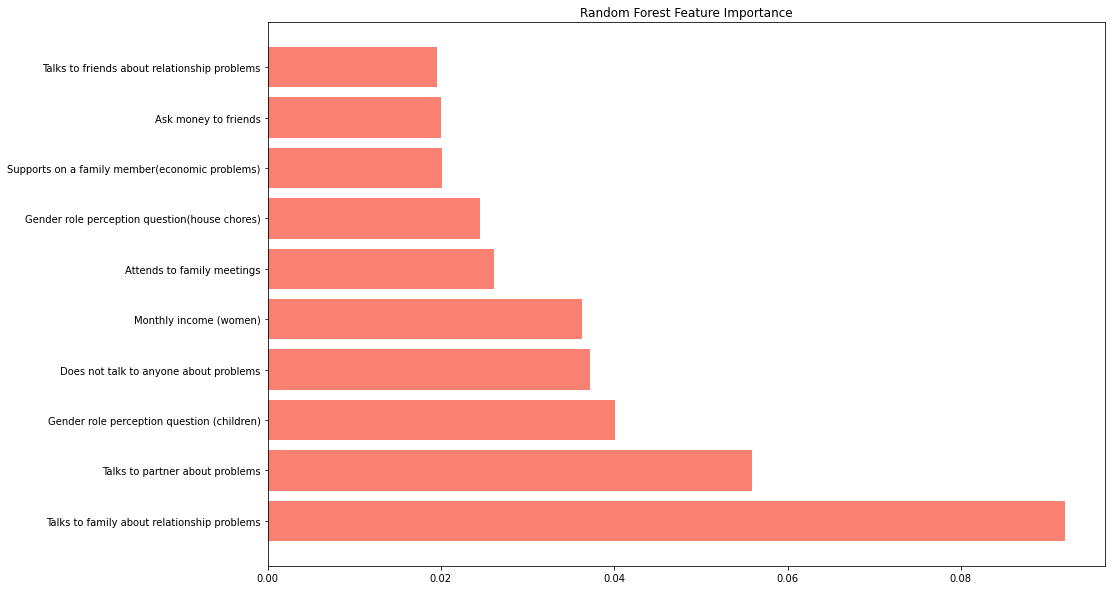

In [ ]:
# Get feature importances
importances = grid_random.best_estimator_.feature_importances_

# Sort in descending order
indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
names = [train_features.columns.values[i] for i in indices]

# Plot
plt.figure(figsize=(15, 10))
plt.barh(range(test_features[names[:10]].shape[1]),importances[indices[:10]], color='salmon')
#plt.xticks(range(test_features[names[:10]].shape[1]), names[:10], rotation=90)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['Talks to family about relationship problems', 'Talks to partner about problems', 'Gender role perception question (children)',
                                            'Does not talk to anyone about problems', 'Monthly income (women)', 'Attends to family meetings',
                                            'Gender role perception question(house chores)', 'Supports on a family member(economic problems)', 
                                            'Ask money to friends', 'Talks to friends about relationship problems'])
plt.title('Random Forest Feature Importance')
plt.savefig(plots + '/rf_importance.png')
plt.show()

In [ ]:
est_rf_ib = RandomForestClassifier()
grid_rfib = GridSearchCV(estimator=est_rf_ib, 
                         param_grid=param_rf, 
                         scoring=['accuracy', 'precision', 'recall'], 
                         cv=k,
                         refit='recall',
                        return_train_score=True)
grid_rfib.fit(train_features, train_target)

In [ ]:
y_rfib_pred = grid_rfib.predict(test_features)
search_rf = pd.DataFrame(grid_rfib.cv_results_) 
sort_search_rfib = search_rf.sort_values(by=['rank_test_accuracy'])
sort_search_rfib[['mean_fit_time', 'mean_score_time', 'param_criterion', 'param_max_depth', 'param_min_samples_split', 
                'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']]

In [ ]:
best_model_rfib = grid_rfib.best_estimator_
print(grid_rfib.best_params_)
y_predicted_rfib = best_model_rfib.predict(test_features)
print(classification_report(test_target, y_predicted_rfib))

## Graphing Precision - Recall Curve

NameError: ignored

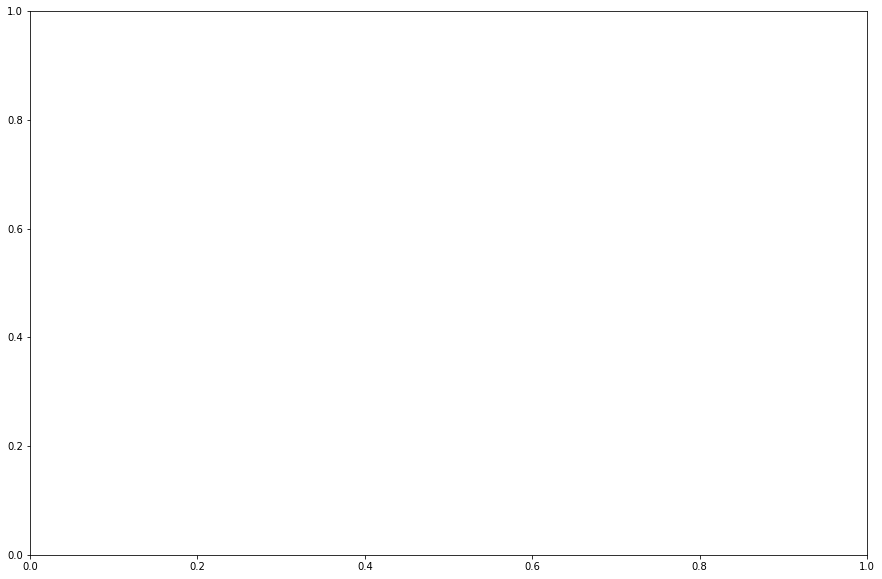

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
disp_rf = plot_precision_recall_curve(grid_random.best_estimator_, test_features, test_target, ax=ax)
disp =  plot_precision_recall_curve(grid_tree.best_estimator_,, test_features, test_target, ax=ax)
plt.title("Precision-recall curve")
plt.savefig(plots + '/Precision-recall.png')
plt.show()

## 3. PCA

In [ ]:
#Normalization of features
features_pca = db.drop(columns='suffers_violence')

def normalize_cols(dataframe, cols):

  for col in cols:
    dataframe[col] = (dataframe[col] - dataframe[col].mean()) / dataframe[col].std()

cols_to_normalize = ['P1_2', 'P1_3', 'EDAD', 'ing_mens_h', 'ing_mens_m', 'num_per_hog','num_mujeres_hog', 'mujeres_adultas', 'mujeres_no_adultas', 'num_indigenas', 
           'num_trabajadoras', 'num_hombres_hog', 'hombres_adultos', 'hombres_no_adultos', 'h_num_indigenas', 'num_trabajadores', 'dif_edad', 'ing_mens_m', 'ing_mens_h', 
           'num_per_viv']


normalize_cols(features_pca, cols_to_normalize)

In [ ]:
#Graph explained variance
def scree_plot(pca_obj):
    """
    Create scree plot for PCA. 
    :param pca_obj: sklearn.decomposition.PCA object
    :return:
    """
    sns.lineplot(x=range(1, pca_obj.n_components+1), y=pca_obj.explained_variance_ratio_)
    plt.xlabel("Principal component number")
    plt.ylabel("Variance explained")
    plt.title("Scree plot for PCA")

#pca = PCA(n_components = 40)
pca = PCA(n_components = 10, svd_solver='full')
principalComponents = pca.fit(features_pca.T)
scree_plot(pca)

In [ ]:
#Get features correlation to pca vectors

main_components = pca.components_

def corr_matrix(features, pca_components):
  cols = ["PCA_VECTOR_" + str(i+1) for i in range(len(pca_components))]
  results = pd.DataFrame(columns=cols)
  
  for i in features:
        variable = features.loc[:, i].values
        row = []
        for pc_vector in pca_components:
            row.append(np.corrcoef(pc_vector, variable)[0][1])
        serie = pd.Series(row, index = results.columns)
        results = results.append(serie, ignore_index=True)
        
  names = pd.DataFrame({'names_features': col_names})
  results = pd.concat([results, names], axis=1)
  results.set_index('names_features', inplace=True)
  return results

pca_matrix = corr_matrix(features_pca, main_components)
ordered = pca_matrix[pca_matrix > 0.4]
ordered = ordered[ordered.PCA_VECTOR_1.notnull() | ordered.PCA_VECTOR_2.notnull()]
ordered.sort_values(by = 'PCA_VECTOR_1')

3.1 Clustering

In [ ]:
#Sample for clustering
#!pip install kmodes
from kmodes.kmodes import KModes

db['suffers_violence'] = db['suffers_violence'].astype(int)
features_target = pd.concat([features_pca, db['suffers_violence']], axis=1)
sample_target = features_target.sample(frac=0.50, replace=True, random_state=1)
sample = sample_target[:]
sample.drop(columns='suffers_violence', inplace= True)
clustering = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
y_pred_clustering = clustering.fit_predict(sample[['P2_5','PAREN', 'p_licenciatura_terminada','dif_edad']])
sample_target['label'] = y_pred_clustering
sample_target = sample_target[sample_target['label'] != -1]

In [ ]:
#Table of distribution
proportions = pd.DataFrame()
proportions['Not Suffers Violence'] = sample_target[sample_target['suffers_violence']== 0 ]['label'].value_counts()/len(sample_target[sample_target['suffers_violence']== 0 ])
proportions['Suffers Violence'] = sample_target[sample_target['suffers_violence']== 1 ]['label'].value_counts()/len(sample_target[sample_target['suffers_violence']== 1 ])
proportions